In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from fuzzywuzzy import process
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf


#LENDO E TRATANDO DADOS ELEIÇÃO

In [572]:
df_eleicoes = pd.read_csv("DadosEleicoes2018.csv", encoding='ISO-8859-1', sep=";")

#Foi necessário usar a especificação do encoding e do separador para poder importar os dados corretamente

In [573]:
df_eleicoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17402 entries, 0 to 17401
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ano de eleição  17402 non-null  int64 
 1   Município       17402 non-null  object
 2   UF              17402 non-null  object
 3   Região          17402 non-null  object
 4   Turno           17402 non-null  int64 
 5   Nome candidato  17402 non-null  object
 6   Cargo           17402 non-null  object
 7   Votos válidos   17402 non-null  int64 
 8   Votos nominais  17402 non-null  int64 
 9   Data de carga   17402 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


In [574]:
df_eleicoes.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Data de carga
0,2018,IGUARAÇU,PR,SUL,2,JAIR MESSIAS BOLSONARO,Presidente,2696,1858,2023-03-31 10:03:12
1,2018,ABADIA DOS DOURADOS,MG,SUDESTE,2,ANTONIO AUGUSTO JUNHO ANASTASIA,Governador,3649,329,2023-03-31 10:03:12
2,2018,SÃO PAULO,SP,SUDESTE,2,MARCIO LUIZ FRANÇA GOMES,Governador,5840401,3393092,2023-03-31 10:03:12
3,2018,PIRACURUCA,PI,NORDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,16935,3782,2023-03-31 10:03:12
4,2018,BOM SUCESSO,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,9447,5548,2023-03-31 10:03:12


In [575]:
#A data da carga não me importa, então vou dropar a coluna

df_eleicoes = df_eleicoes.drop(columns=["Data de carga"])
df_eleicoes.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais
0,2018,IGUARAÇU,PR,SUL,2,JAIR MESSIAS BOLSONARO,Presidente,2696,1858
1,2018,ABADIA DOS DOURADOS,MG,SUDESTE,2,ANTONIO AUGUSTO JUNHO ANASTASIA,Governador,3649,329
2,2018,SÃO PAULO,SP,SUDESTE,2,MARCIO LUIZ FRANÇA GOMES,Governador,5840401,3393092
3,2018,PIRACURUCA,PI,NORDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,16935,3782
4,2018,BOM SUCESSO,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,9447,5548


In [576]:
#Verificando se temos duplicados
df_eleicoes.duplicated().sum()

np.int64(0)

In [577]:
#Verificando se temos NaN, apesar de que verifiquei acima que as colunas todas aparecem todas com o mesmo número de Non-null
df_eleicoes.notna().sum()

Ano de eleição    17402
Município         17402
UF                17402
Região            17402
Turno             17402
Nome candidato    17402
Cargo             17402
Votos válidos     17402
Votos nominais    17402
dtype: int64

In [578]:
#Removendo linhas que tenham Governador especificado no Cargo (porque me interessam os valores de Presidente). Apliquei um filtro para manter apenas as linhas em que Cargo era != de Governador
df_eleicoes = df_eleicoes[df_eleicoes["Cargo"] != "Governador"]
df_eleicoes.head()


,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais
0,2018,IGUARAÇU,PR,SUL,2,JAIR MESSIAS BOLSONARO,Presidente,2696,1858
3,2018,PIRACURUCA,PI,NORDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,16935,3782
4,2018,BOM SUCESSO,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,9447,5548
5,2018,PORTO ALEGRE,RS,SUL,2,FERNANDO HADDAD,Presidente,768062,331419
6,2018,CHÃ GRANDE,PE,NORDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,12825,3750


In [579]:
#Verificando meu DataFrame final de eleições
df_eleicoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11416 entries, 0 to 17401
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ano de eleição  11416 non-null  int64 
 1   Município       11416 non-null  object
 2   UF              11416 non-null  object
 3   Região          11416 non-null  object
 4   Turno           11416 non-null  int64 
 5   Nome candidato  11416 non-null  object
 6   Cargo           11416 non-null  object
 7   Votos válidos   11416 non-null  int64 
 8   Votos nominais  11416 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 891.9+ KB


In [580]:
print(df_eleicoes.duplicated().sum())
print(df_eleicoes.notna().sum())

0
Ano de eleição    11416
Município         11416
UF                11416
Região            11416
Turno             11416
Nome candidato    11416
Cargo             11416
Votos válidos     11416
Votos nominais    11416
dtype: int64


In [581]:
df_eleicoes.value_counts().sum()

np.int64(11416)

In [582]:
df_eleicoes.nunique()

Ano de eleição       1
Município         5425
UF                  28
Região               6
Turno                1
Nome candidato       2
Cargo                1
Votos válidos     4812
Votos nominais    6725
dtype: int64

In [583]:
df_eleicoes = df_eleicoes.sort_values(by=["UF", "Município", "Votos nominais"])
df_eleicoes.head()


,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais
13977,2018,ACRELÂNDIA,AC,NORTE,2,FERNANDO HADDAD,Presidente,6465,1300
17344,2018,ACRELÂNDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165
5211,2018,ASSIS BRASIL,AC,NORTE,2,FERNANDO HADDAD,Presidente,3993,1660
2808,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333
10288,2018,BRASILÉIA,AC,NORTE,2,FERNANDO HADDAD,Presidente,11919,3208


In [584]:
df_eleicoes = df_eleicoes.groupby(["UF", "Município"]).tail(1)
df_eleicoes.shape

(5708, 9)

In [585]:
df_eleicoes = df_eleicoes[df_eleicoes["UF"] != "ZZ"]
df_eleicoes.shape

(5570, 9)

In [586]:
#aplicando unidecode para normalizar nome do município
df_eleicoes['Município'] = df_eleicoes['Município'].apply(unidecode)
df_eleicoes.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais
17344,2018,ACRELANDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165
2808,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333
12270,2018,BRASILEIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,11919,8711
9035,2018,BUJARI,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,5950,4676
10024,2018,CAPIXABA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,4981,3895


In [587]:
df_eleicoes["Estado_Municipio"] = df_eleicoes["UF"] + "-" + df_eleicoes["Município"]
df_eleicoes.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio
17344,2018,ACRELANDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165,AC-ACRELANDIA
2808,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333,AC-ASSIS BRASIL
12270,2018,BRASILEIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,11919,8711,AC-BRASILEIA
9035,2018,BUJARI,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,5950,4676,AC-BUJARI
10024,2018,CAPIXABA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,4981,3895,AC-CAPIXABA


In [588]:
#Salvando o DataFrame de Eleições tratado
df_eleicoes.to_csv("DadosEleicoes2018-Tratado.csv")

#LENDO E TRATANDO DADOS DAS VACINAS

In [589]:
df_vacinas = pd.read_csv("DadosVacinas2015-2022.csv", encoding='ISO-8859-1', sep=";")

In [590]:
df_vacinas.head()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Total
0,110001 ALTA FLORESTA D\'OESTE,"62,04","48,97","82,70","124,85","99,72","82,20","68,12","114,11","84,60"
1,110002 ARIQUEMES,"112,03","104,25","107,29","100,24","98,20","82,25","84,38","112,61","99,82"
2,110003 CABIXI,"13,51","29,33","36,00","32,88","17,91","56,72","56,25","94,20","41,90"
3,110004 CACOAL,"135,95","114,15","128,46","125,34","109,09","87,47","97,38","125,51","114,66"
4,110005 CEREJEIRAS,"83,76","57,43","85,14","71,48","44,04","84,12","102,11","110,78","79,59"


In [591]:
df_vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5571 non-null   object
 1   2015       5571 non-null   object
 2   2016       5571 non-null   object
 3   2017       5571 non-null   object
 4   2018       5571 non-null   object
 5   2019       5571 non-null   object
 6   2020       5571 non-null   object
 7   2021       5571 non-null   object
 8   2022       5571 non-null   object
 9    Total     5571 non-null   object
dtypes: object(10)
memory usage: 435.4+ KB


In [592]:
#O número de linhas não correspondia ao número de municípios, assim foi encontrada uma linha de total ao final do DF
df_vacinas.tail()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Total
5566,522205 VICENTINOPOLIS,"113,89","85,16","85,16","118,87","101,82","70,00","46,43","110,79","91,60"
5567,522220 VILA BOA,"25,33","12,86","35,71","25,42","37,70","42,62","74,00","113,73","42,66"
5568,522230 VILA PROPICIO,"45,45","70,69","98,28","97,92","106,06","78,79","40,85","90,57","76,95"
5569,530010 BRASILIA,"78,27","138,11","93,61","89,50","93,24","91,32","98,78","114,88","99,54"
5570,Total,"105,08","95,55","97,98","99,72","86,67","77,14","74,97","90,06","90,94"


In [593]:
#Essa linha foi dropada para deixar apenas as linhas referentes aos municípios
df_vacinas = df_vacinas.drop(5570, axis=0)

In [594]:
#Verificando se a linha sumiu
df_vacinas.tail()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Total
5565,522200 VIANOPOLIS,"115,85","101,08","101,08","130,18","102,04","94,90","113,78","103,49","107,38"
5566,522205 VICENTINOPOLIS,"113,89","85,16","85,16","118,87","101,82","70,00","46,43","110,79","91,60"
5567,522220 VILA BOA,"25,33","12,86","35,71","25,42","37,70","42,62","74,00","113,73","42,66"
5568,522230 VILA PROPICIO,"45,45","70,69","98,28","97,92","106,06","78,79","40,85","90,57","76,95"
5569,530010 BRASILIA,"78,27","138,11","93,61","89,50","93,24","91,32","98,78","114,88","99,54"


In [595]:
#verificando as infos
df_vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5570 non-null   object
 1   2015       5570 non-null   object
 2   2016       5570 non-null   object
 3   2017       5570 non-null   object
 4   2018       5570 non-null   object
 5   2019       5570 non-null   object
 6   2020       5570 non-null   object
 7   2021       5570 non-null   object
 8   2022       5570 non-null   object
 9    Total     5570 non-null   object
dtypes: object(10)
memory usage: 435.3+ KB


In [596]:
#Passando as colunas de vacinação para numéricas

colunas_para_numeros = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

for coluna in colunas_para_numeros:
    df_vacinas[coluna] = df_vacinas[coluna].str.replace(",", ".").astype(float)

df_vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Município  5570 non-null   object 
 1   2015       5570 non-null   float64
 2   2016       5570 non-null   float64
 3   2017       5570 non-null   float64
 4   2018       5570 non-null   float64
 5   2019       5570 non-null   float64
 6   2020       5570 non-null   float64
 7   2021       5570 non-null   float64
 8   2022       5570 non-null   float64
 9    Total     5570 non-null   object 
dtypes: float64(8), object(2)
memory usage: 435.3+ KB


In [597]:
df_vacinas.columns

Index(['Município', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', ' Total'],
      dtype='object')

In [598]:
#Removendo a coluna " Total" (que tem um espaço antes do nome dela oO) porque não me interesse na análise que farei
df_vacinas = df_vacinas.drop(columns=[" Total"])
df_vacinas.head()

,Município,2015,2016,2017,2018,2019,2020,2021,2022
0,110001 ALTA FLORESTA D\'OESTE,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11
1,110002 ARIQUEMES,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61
2,110003 CABIXI,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20
3,110004 CACOAL,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51
4,110005 CEREJEIRAS,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78


In [599]:
#Separando o nome do município do código do município que vêm unificados
df_vacinas[['Código', 'Nome Município']] = df_vacinas['Município'].str.split(' ', n=1, expand=True)

# Exibir as primeiras linhas do DataFrame para verificar o resultado
df_vacinas.head()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Código,Nome Município
0,110001 ALTA FLORESTA D\'OESTE,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,110001,ALTA FLORESTA D\'OESTE
1,110002 ARIQUEMES,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,110002,ARIQUEMES
2,110003 CABIXI,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,110003,CABIXI
3,110004 CACOAL,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,110004,CACOAL
4,110005 CEREJEIRAS,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,110005,CEREJEIRAS


In [600]:
# Removendo a barra invertida na coluna "Nome Município", necessário usar \\ ao invés de só \ porque a barra invertida é um caracter especial no Python
df_vacinas["Nome Município"] = df_vacinas["Nome Município"].str.replace("\\", "")
df_vacinas.head()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Código,Nome Município
0,110001 ALTA FLORESTA D\'OESTE,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,110001,ALTA FLORESTA D'OESTE
1,110002 ARIQUEMES,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,110002,ARIQUEMES
2,110003 CABIXI,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,110003,CABIXI
3,110004 CACOAL,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,110004,CACOAL
4,110005 CEREJEIRAS,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,110005,CEREJEIRAS


In [601]:
df_vacinas = df_vacinas.drop(columns="Município")
df_vacinas.head()

,2015,2016,2017,2018,2019,2020,2021,2022,Código,Nome Município
0,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,110001,ALTA FLORESTA D'OESTE
1,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,110002,ARIQUEMES
2,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,110003,CABIXI
3,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,110004,CACOAL
4,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,110005,CEREJEIRAS


In [602]:
#Reorganizando o DataFrame

colunas_para_manter = ["Nome Município", "Código"]
nova_ordem = colunas_para_manter + [col for col in df_vacinas.columns if col not in colunas_para_manter]
df_vacinas = df_vacinas[nova_ordem]
df_vacinas.head()

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78


In [603]:
#aplicando unidecode nesses nomes de Município para garantir correspondência com o outro DataFrame
df_vacinas['Nome Município'] = df_vacinas['Nome Município'].apply(unidecode)
df_vacinas.sort_values(by="Nome Município")
df_vacinas.head(30)

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78
5,COLORADO DO OESTE,110006,23.83,20.15,42.49,25.11,19.75,50.21,96.26,171.92
6,CORUMBIARA,110007,6.90,15.20,104.00,100.00,50.57,55.17,63.78,65.42
7,COSTA MARQUES,110008,103.42,64.42,65.17,110.33,131.48,84.26,68.67,100.53
8,ESPIGAO D'OESTE,110009,100.86,103.43,93.33,89.30,71.48,83.49,104.00,64.12
9,GUAJARA-MIRIM,110010,120.69,122.83,80.87,102.38,85.39,57.24,75.16,71.33


In [604]:
#O dataframe de vacinas não possuía uma coluna estado e, por padrão eu não consigo extrair isso do Tabnet do DataSus, então conferi se eu tinha municípios com nomes repetidos e, sim, eu tinha. Como o código do SUS não bate com o código do TSE eu precisava da informação do estado aqui.
df_vacinas["Nome Município"].value_counts()

Nome Município
BOM JESUS               5
SAO DOMINGOS            5
VERA CRUZ               4
SAO FRANCISCO           4
SANTA LUZIA             4
                       ..
CORACAO DE MARIA        1
CONTENDAS DO SINCORA    1
CONDEUBA                1
CONCEICAO DO JACUIPE    1
BRASILIA                1
Name: count, Length: 5290, dtype: int64

#TRATANDO O DF COM OS ESTADOS PARA PERMITIR UM MERGE DEPOIS

In [605]:
#Pelo mesmo sistema do Tabnet eu congiso extrair um outro csv que consegue me trazer os estados como colunas.
df_estados = pd.read_csv("VacinasEstado.csv", encoding='ISO-8859-1', sep=";")
df_estados.head()

,Município,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,110001 ALTA FLORESTA D\'OESTE,"84,60",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"84,60"
1,110002 ARIQUEMES,"99,82",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"99,82"
2,110003 CABIXI,"41,90",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"41,90"
3,110004 CACOAL,"114,66",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"114,66"
4,110005 CEREJEIRAS,"79,59",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"79,59"


In [606]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5571 non-null   object
 1   RO         5571 non-null   object
 2   AC         5571 non-null   object
 3   AM         5571 non-null   object
 4   RR         5571 non-null   object
 5   PA         5571 non-null   object
 6   AP         5571 non-null   object
 7   TO         5571 non-null   object
 8   MA         5571 non-null   object
 9   PI         5571 non-null   object
 10  CE         5571 non-null   object
 11  RN         5571 non-null   object
 12  PB         5571 non-null   object
 13  PE         5571 non-null   object
 14  AL         5571 non-null   object
 15  SE         5571 non-null   object
 16  BA         5571 non-null   object
 17  MG         5571 non-null   object
 18  ES         5571 non-null   object
 19  RJ         5571 non-null   object
 20  SP         5571 non-null   obj

In [607]:
#Essa linha foi dropada para deixar apenas as linhas referentes aos municípios como no outro DF das vacinas
df_estados= df_estados.drop(5570, axis=0)

In [608]:
#Aqui apliquei os mesmos tratamentos que apliquei no DF de vacinas, separando município e código, padronizando com o unidecode, tirando a barra que estava sobrando etc.
df_estados[['Código', 'Nome Município']] = df_estados['Município'].str.split(' ', n=1, expand=True)
df_estados['Nome Município'] = df_estados['Nome Município'].apply(unidecode)
df_estados["Nome Município"] = df_estados["Nome Município"].str.replace("\\", "")
# Exibir as primeiras linhas do DataFrame para verificar o resultado
df_estados.head()

,Município,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,PR,SC,RS,MS,MT,GO,DF,Total,Código,Nome Município
0,110001 ALTA FLORESTA D\'OESTE,"84,60",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"84,60",110001,ALTA FLORESTA D'OESTE
1,110002 ARIQUEMES,"99,82",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"99,82",110002,ARIQUEMES
2,110003 CABIXI,"41,90",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"41,90",110003,CABIXI
3,110004 CACOAL,"114,66",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"114,66",110004,CACOAL
4,110005 CEREJEIRAS,"79,59",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"79,59",110005,CEREJEIRAS


In [609]:
#Aqui reorganizei o DataFrame dos Estados

colunas_para_manter = ["Nome Município", "Código"]
nova_ordem = colunas_para_manter + [col for col in df_estados.columns if col not in colunas_para_manter]
df_estados = df_estados[nova_ordem]
df_estados = df_estados.drop(columns="Município")
df_estados.head()

,Nome Município,Código,RO,AC,AM,RR,PA,AP,TO,MA,...,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,ALTA FLORESTA D'OESTE,110001,"84,60",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"84,60"
1,ARIQUEMES,110002,"99,82",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"99,82"
2,CABIXI,110003,"41,90",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"41,90"
3,CACOAL,110004,"114,66",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"114,66"
4,CEREJEIRAS,110005,"79,59",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"79,59"


In [610]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nome Município  5570 non-null   object
 1   Código          5570 non-null   object
 2   RO              5570 non-null   object
 3   AC              5570 non-null   object
 4   AM              5570 non-null   object
 5   RR              5570 non-null   object
 6   PA              5570 non-null   object
 7   AP              5570 non-null   object
 8   TO              5570 non-null   object
 9   MA              5570 non-null   object
 10  PI              5570 non-null   object
 11  CE              5570 non-null   object
 12  RN              5570 non-null   object
 13  PB              5570 non-null   object
 14  PE              5570 non-null   object
 15  AL              5570 non-null   object
 16  SE              5570 non-null   object
 17  BA              5570 non-null   object
 18  MG      

In [611]:
df_estados.columns

Index(['Nome Município', 'Código', 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ',
       'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', ' Total'],
      dtype='object')

In [612]:
#Passando as colunas dos estados para numéricas

colunas_estados_para_numeros = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ',
       'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

for coluna in colunas_estados_para_numeros:
    df_estados[coluna] = df_estados[coluna].str.replace(",", ".").astype(float)

df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nome Município  5570 non-null   object 
 1   Código          5570 non-null   object 
 2   RO              5570 non-null   float64
 3   AC              5570 non-null   float64
 4   AM              5570 non-null   float64
 5   RR              5570 non-null   float64
 6   PA              5570 non-null   float64
 7   AP              5570 non-null   float64
 8   TO              5570 non-null   float64
 9   MA              5570 non-null   float64
 10  PI              5570 non-null   float64
 11  CE              5570 non-null   float64
 12  RN              5570 non-null   float64
 13  PB              5570 non-null   float64
 14  PE              5570 non-null   float64
 15  AL              5570 non-null   float64
 16  SE              5570 non-null   float64
 17  BA              5570 non-null   f

In [613]:
# Aqui, com a ajuda da IA generativa criei um script para verificar quando a informação da coluna era diferente de 0 e retornar em uma nova coluna a informação do Estado, com isso, consegui um DataFrame com a informação do Estado para cada muinicípio
lista_estados = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA',
                 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG',
                 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

# Função para buscar o estado baseado no valor diferente de zero
def buscar_estado(row):
    for estado in lista_estados:
        if row[estado] != 0:
            return estado
    return None

# Aplicar a função para criar uma nova coluna com o estado correspondente
df_estados['Estado'] = df_estados.apply(buscar_estado, axis=1)

# Exibir as primeiras 20 linhas do DataFrame atualizado
df_estados.head(20)

,Nome Município,Código,RO,AC,AM,RR,PA,AP,TO,MA,...,SP,PR,SC,RS,MS,MT,GO,DF,Total,Estado
0,ALTA FLORESTA D'OESTE,110001,84.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"84,60",RO
1,ARIQUEMES,110002,99.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"99,82",RO
2,CABIXI,110003,41.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"41,90",RO
3,CACOAL,110004,114.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"114,66",RO
4,CEREJEIRAS,110005,79.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"79,59",RO
5,COLORADO DO OESTE,110006,52.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"52,54",RO
6,CORUMBIARA,110007,59.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"59,04",RO
7,COSTA MARQUES,110008,89.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"89,32",RO
8,ESPIGAO D'OESTE,110009,88.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"88,41",RO
9,GUAJARA-MIRIM,110010,90.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"90,05",RO


In [614]:
# Agora é só mergear essa informação no DataFrame de vacinas

df_vacinas = pd.merge(df_vacinas, df_estados[['Código', 'Estado']], on='Código', how='left')

# Exibindo o DataFrame resultante
df_vacinas.head(20)

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,RO
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,RO
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,RO
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,RO
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,RO
5,COLORADO DO OESTE,110006,23.83,20.15,42.49,25.11,19.75,50.21,96.26,171.92,RO
6,CORUMBIARA,110007,6.90,15.20,104.00,100.00,50.57,55.17,63.78,65.42,RO
7,COSTA MARQUES,110008,103.42,64.42,65.17,110.33,131.48,84.26,68.67,100.53,RO
8,ESPIGAO D'OESTE,110009,100.86,103.43,93.33,89.30,71.48,83.49,104.00,64.12,RO
9,GUAJARA-MIRIM,110010,120.69,122.83,80.87,102.38,85.39,57.24,75.16,71.33,RO


In [615]:
df_vacinas["Estado_Municipio"] = df_vacinas["Estado"] + "-" + df_vacinas["Nome Município"]
df_vacinas.head()

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado,Estado_Municipio
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,RO,RO-ALTA FLORESTA D'OESTE
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,RO,RO-ARIQUEMES
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,RO,RO-CABIXI
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,RO,RO-CACOAL
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,RO,RO-CEREJEIRAS


In [616]:
df_vacinas.to_csv("DadosVacinas2015-2022-Tratado.csv", index=False)
df_vacinas.head(50)

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado,Estado_Municipio
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,RO,RO-ALTA FLORESTA D'OESTE
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,RO,RO-ARIQUEMES
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,RO,RO-CABIXI
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,RO,RO-CACOAL
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,RO,RO-CEREJEIRAS
5,COLORADO DO OESTE,110006,23.83,20.15,42.49,25.11,19.75,50.21,96.26,171.92,RO,RO-COLORADO DO OESTE
6,CORUMBIARA,110007,6.90,15.20,104.00,100.00,50.57,55.17,63.78,65.42,RO,RO-CORUMBIARA
7,COSTA MARQUES,110008,103.42,64.42,65.17,110.33,131.48,84.26,68.67,100.53,RO,RO-COSTA MARQUES
8,ESPIGAO D'OESTE,110009,100.86,103.43,93.33,89.30,71.48,83.49,104.00,64.12,RO,RO-ESPIGAO D'OESTE
9,GUAJARA-MIRIM,110010,120.69,122.83,80.87,102.38,85.39,57.24,75.16,71.33,RO,RO-GUAJARA-MIRIM


Agora temos os dataframes com os valores tratados e com uma coluna que permite a correlação entre eles (coluna Estado_Municipio).
Para facilitar a construção do DataFrame no Tableau, vamos deixar as informações unificadas.

In [617]:
#verificando as informacoes do df_eleicoes
df_eleicoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 17344 to 13974
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ano de eleição    5570 non-null   int64 
 1   Município         5570 non-null   object
 2   UF                5570 non-null   object
 3   Região            5570 non-null   object
 4   Turno             5570 non-null   int64 
 5   Nome candidato    5570 non-null   object
 6   Cargo             5570 non-null   object
 7   Votos válidos     5570 non-null   int64 
 8   Votos nominais    5570 non-null   int64 
 9   Estado_Municipio  5570 non-null   object
dtypes: int64(4), object(6)
memory usage: 478.7+ KB


In [618]:
#verificando as informacoes do df_vacinas
df_vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome Município    5570 non-null   object 
 1   Código            5570 non-null   object 
 2   2015              5570 non-null   float64
 3   2016              5570 non-null   float64
 4   2017              5570 non-null   float64
 5   2018              5570 non-null   float64
 6   2019              5570 non-null   float64
 7   2020              5570 non-null   float64
 8   2021              5570 non-null   float64
 9   2022              5570 non-null   float64
 10  Estado            5570 non-null   object 
 11  Estado_Municipio  5570 non-null   object 
dtypes: float64(8), object(4)
memory usage: 522.3+ KB


In [619]:
#combinando os DataFrames
df_combinado = pd.merge(df_eleicoes, df_vacinas, on="Estado_Municipio", how="inner")
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5548 entries, 0 to 5547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano de eleição    5548 non-null   int64  
 1   Município         5548 non-null   object 
 2   UF                5548 non-null   object 
 3   Região            5548 non-null   object 
 4   Turno             5548 non-null   int64  
 5   Nome candidato    5548 non-null   object 
 6   Cargo             5548 non-null   object 
 7   Votos válidos     5548 non-null   int64  
 8   Votos nominais    5548 non-null   int64  
 9   Estado_Municipio  5548 non-null   object 
 10  Nome Município    5548 non-null   object 
 11  Código            5548 non-null   object 
 12  2015              5548 non-null   float64
 13  2016              5548 non-null   float64
 14  2017              5548 non-null   float64
 15  2018              5548 non-null   float64
 16  2019              5548 non-null   float64


Após essa combinação verifiquei que o número de séries diminuiu. Onde deveria ter 5570 municípios passamos a ter apenas 5548 informações.
Com a ajuda da IA generativa, um script simples permitiu verificar quais eram os valores que não estavam sendo encontrados no outro dataframe do merge.

In [620]:
eleicoes_nao_encontrados = df_eleicoes[~df_eleicoes["Estado_Municipio"].isin(df_vacinas["Estado_Municipio"])]

# Exibir as linhas que estão faltando no df_combinado
eleicoes_nao_encontrados.head(30)


,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio
7380,2018,CAMACA,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,11588,7323,BA-CAMACA
11345,2018,MUQUEM DO SAO FRANCISCO,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,6023,4952,BA-MUQUEM DO SAO FRANCISCO
106,2018,QUINJINGUE,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,14394,11907,BA-QUINJINGUE
1737,2018,SANTA TEREZINHA,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,5571,4715,BA-SANTA TEREZINHA
16920,2018,ITAPAJE,CE,NORDESTE,2,FERNANDO HADDAD,Presidente,28365,20248,CE-ITAPAJE
7381,2018,OLHOS D'AGUA,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,3095,2387,MG-OLHOS D'AGUA
1961,2018,PASSA VINTE,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,1424,791,MG-PASSA VINTE
16625,2018,PINGO D'AGUA,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,2412,1388,MG-PINGO D'AGUA
6560,2018,SEM PEIXE,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,1786,1213,MG-SEM PEIXE
9945,2018,POXOREU,MT,CENTRO-OESTE,2,FERNANDO HADDAD,Presidente,8004,4094,MT-POXOREU


In [621]:
vacinas_nao_encontrados = df_vacinas[~df_vacinas["Estado_Municipio"].isin(df_eleicoes["Estado_Municipio"])]

# Exibir as linhas que estão faltando no df_combinado
vacinas_nao_encontrados.head(30)


,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado,Estado_Municipio
8,ESPIGAO D'OESTE,110009,100.86,103.43,93.33,89.30,71.48,83.49,104.00,64.12,RO,RO-ESPIGAO D'OESTE
24,ALVORADA D'OESTE,110034,92.27,95.65,69.02,88.55,93.26,76.97,40.98,85.71,RO,RO-ALVORADA D'OESTE
259,SANTA IZABEL DO PARA,150650,36.54,28.66,38.59,71.39,51.46,46.46,67.77,94.68,PA,PA-SANTA IZABEL DO PARA
977,ITAPAGE,230630,99.72,102.84,141.55,106.70,112.05,123.41,42.44,145.37,CE,CE-ITAPAGE
1076,ACU,240020,92.34,61.75,64.63,59.79,94.21,82.91,77.93,115.59,RN,RN-ACU
1087,AUGUSTO SEVERO,240130,81.03,35.29,47.06,66.67,82.52,67.96,62.64,197.56,RN,RN-AUGUSTO SEVERO
1133,JANUARIO CICCO,240530,8.40,0.00,54.55,74.19,15.28,11.11,20.81,47.77,RN,RN-JANUARIO CICCO
1166,OLHO-D'AGUA DO BORGES,240840,100.00,23.08,53.85,165.00,97.22,102.78,136.11,170.00,RN,RN-OLHO-D'AGUA DO BORGES
1482,BELEM DE SAO FRANCISCO,260160,41.99,49.29,89.24,81.60,96.13,86.45,79.93,122.90,PE,PE-BELEM DE SAO FRANCISCO
1775,GRACHO CARDOSO,280260,96.39,129.41,52.94,50.00,77.50,40.00,112.16,80.95,SE,SE-GRACHO CARDOSO


Percebi que eram pequenas alterações na grafia dos nomes (em um lugar com ~ em outro com N, em um lugar com SS no outro com Ç). Pesquisando, encontrei um algorítimo fuzzywuzzy que permite essa juncao por proximidade.
Para não correr o risco de fazer um merge errado nos valores que já deram certo, peguei apenas os dataframes resultantes da comparação, sendo o eleicoes_nao_encontrados e o vacinas_nao_encontrados.

In [622]:
pip install fuzzywuzzy python-Levenshtein pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [623]:
# Função para encontrar correspondências aproximadas
def merge_approximate(eleicoes_df, vacinas_df, column_name, threshold=50):
    # Cria uma lista para armazenar as correspondências
    matches = []
    
    # Iterar sobre cada município em eleicoes_df
    for municipio in eleicoes_df[column_name]:
        # Encontra o município mais próximo em vacinas_df
        match = process.extractOne(municipio, vacinas_df[column_name], score_cutoff=threshold)
        
        # Se houver uma correspondência válida, armazena os resultados
        if match:  # Se match não for None
            # match é uma tupla com (nome do município correspondente, score)
            municipio_vacinas = match[0]  # Nome do município correspondente
            score = match[1]  # Score de similaridade
            matches.append((municipio, municipio_vacinas, score))
    
    # Cria um DataFrame a partir da lista de correspondências
    match_df = pd.DataFrame(matches, columns=[f'{column_name}_eleicoes', f'{column_name}_vacinas', 'Score'])
    
    return match_df

# Chamar a função para fazer o merge aproximado
resultado_merge = merge_approximate(eleicoes_nao_encontrados, vacinas_nao_encontrados, 'Estado_Municipio', threshold=80)

# Exibir as primeiras 30 linhas do DataFrame resultante
resultado_merge.head(30)


,Estado_Municipio_eleicoes,Estado_Municipio_vacinas,Score
0,BA-CAMACA,BA-CAMACAN,95
1,BA-MUQUEM DO SAO FRANCISCO,BA-MUQUEM DE SAO FRANCISCO,96
2,BA-QUINJINGUE,BA-QUIJINGUE,96
3,BA-SANTA TEREZINHA,BA-SANTA TERESINHA,94
4,CE-ITAPAJE,CE-ITAPAGE,90
5,MG-OLHOS D'AGUA,MG-OLHOS-D'AGUA,100
6,MG-PASSA VINTE,MG-PASSA-VINTE,100
7,MG-PINGO D'AGUA,MG-PINGO-D'AGUA,100
8,MG-SEM PEIXE,MG-SEM-PEIXE,100
9,MT-POXOREU,MT-POXOREO,90


Com esse resultado do fuzzywuzzy percebi que 2 municípios do RN possuem "dois nomes", sendo Boa Saúde = Januario Cicco e Campo Grande = Augusto Severo.
Eles aparecem em ordem oposta nos dataframes resultantes, de modo que eu não poderia só por um index para mergear (seria a forma mais fácil de resolver)

In [624]:
eleicoes_nao_encontrados["Estado_Municipio"].unique()

array(['BA-CAMACA', 'BA-MUQUEM DO SAO FRANCISCO', 'BA-QUINJINGUE',
       'BA-SANTA TEREZINHA', 'CE-ITAPAJE', "MG-OLHOS D'AGUA",
       'MG-PASSA VINTE', "MG-PINGO D'AGUA", 'MG-SEM PEIXE', 'MT-POXOREU',
       'PA-SANTA ISABEL DO PARA', 'PE-BELEM DO SAO FRANCISCO', 'RN-ASSU',
       'RN-BOA SAUDE', 'RN-CAMPO GRANDE', "RN-OLHO D'AGUA DO BORGES",
       'RO-ALVORADA DO OESTE', 'RO-ESPIGAO DO OESTE', 'SC-GRAO-PARA',
       'SE-GRACCHO CARDOSO', 'SP-BIRITIBA MIRIM', 'SP-FLORINEA'],
      dtype=object)

In [625]:
vacinas_nao_encontrados["Estado_Municipio"].unique()

array(["RO-ESPIGAO D'OESTE", "RO-ALVORADA D'OESTE",
       'PA-SANTA IZABEL DO PARA', 'CE-ITAPAGE', 'RN-ACU',
       'RN-AUGUSTO SEVERO', 'RN-JANUARIO CICCO',
       "RN-OLHO-D'AGUA DO BORGES", 'PE-BELEM DE SAO FRANCISCO',
       'SE-GRACHO CARDOSO', 'BA-CAMACAN', 'BA-MUQUEM DE SAO FRANCISCO',
       'BA-QUIJINGUE', 'BA-SANTA TERESINHA', "MG-OLHOS-D'AGUA",
       'MG-PASSA-VINTE', "MG-PINGO-D'AGUA", 'MG-SEM-PEIXE',
       'SP-BIRITIBA-MIRIM', 'SP-FLORINIA', 'SC-GRAO PARA', 'MT-POXOREO'],
      dtype=object)

In [626]:
replace_dict = {
    'BA-CAMACAN': 'BA-CAMACA',
    'BA-MUQUEM DE SAO FRANCISCO':'BA-MUQUEM DO SAO FRANCISCO',
    'BA-QUIJINGUE': 'BA-QUINJINGUE',
    'BA-SANTA TERESINHA':'BA-SANTA TEREZINHA',
    'CE-ITAPAGE': 'CE-ITAPAJE',
    'MG-OLHOS-D\'AGUA': "MG-OLHOS D'AGUA",
    'MG-PASSA-VINTE': 'MG-PASSA VINTE',
    'MG-PINGO-D\'AGUA': "MG-PINGO D'AGUA",
    'MG-SEM-PEIXE': 'MG-SEM PEIXE',
    'MT-POXOREO': 'MT-POXOREU',
    'PA-SANTA IZABEL DO PARA': 'PA-SANTA ISABEL DO PARA',
    'PE-BELEM DE SAO FRANCISCO':'PE-BELEM DO SAO FRANCISCO',
    'RN-ACU': 'RN-ASSU',
    'RN-AUGUSTO SEVERO': 'RN-CAMPO GRANDE',  # Considerando que CAMPO GRANDE tem o mesmo código
    'RN-JANUARIO CICCO': 'RN-BOA SAUDE',    # Considerando que BOA SAUDE tem o mesmo código
    "RN-OLHO-D'AGUA DO BORGES":"RN-OLHO D'AGUA DO BORGES",
    'RO-ALVORADA D\'OESTE': 'RO-ALVORADA DO OESTE',
    'RO-ESPIGAO D\'OESTE': 'RO-ESPIGAO DO OESTE',
    'SC-GRAO PARA': 'SC-GRAO-PARA',
    'SE-GRACHO CARDOSO': 'SE-GRACCHO CARDOSO',
    'SP-BIRITIBA-MIRIM': 'SP-BIRITIBA MIRIM',
    'SP-FLORINIA':'SP-FLORINEA'
}

# Aplicar o replace no DataFrame de vacinas
vacinas_nao_encontrados['Estado_Municipio'] = vacinas_nao_encontrados['Estado_Municipio'].replace(replace_dict)

# Realizar o inner join
df_nome_ajustado = pd.merge(eleicoes_nao_encontrados, vacinas_nao_encontrados, on="Estado_Municipio", how="inner")


# Exibir o DataFrame resultante sem o índice
df_nome_ajustado.head(30)

/var/folders/kq/wv1bddkn1plgr7f5w53khhv80000gn/T/ipykernel_14566/988476409.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacinas_nao_encontrados['Estado_Municipio'] = vacinas_nao_encontrados['Estado_Municipio'].replace(replace_dict)


,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio,...,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado
0,2018,CAMACA,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,11588,7323,BA-CAMACA,...,290560,112.30,85.47,105.67,100.53,84.14,66.40,101.19,120.58,BA
1,2018,MUQUEM DO SAO FRANCISCO,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,6023,4952,BA-MUQUEM DO SAO FRANCISCO,...,292225,105.00,78.49,120.35,127.88,152.76,73.62,69.23,91.53,BA
2,2018,QUINJINGUE,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,14394,11907,BA-QUINJINGUE,...,292590,91.00,110.78,120.59,91.29,114.05,72.18,57.31,101.99,BA
3,2018,SANTA TEREZINHA,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,5571,4715,BA-SANTA TEREZINHA,...,292850,74.10,65.32,58.87,92.79,84.26,148.15,64.22,105.41,BA
4,2018,ITAPAJE,CE,NORDESTE,2,FERNANDO HADDAD,Presidente,28365,20248,CE-ITAPAJE,...,230630,99.72,102.84,141.55,106.70,112.05,123.41,42.44,145.37,CE
5,2018,OLHOS D'AGUA,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,3095,2387,MG-OLHOS D'AGUA,...,314545,14.12,1.35,6.76,27.14,24.64,5.80,12.20,6.82,MG
6,2018,PASSA VINTE,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,1424,791,MG-PASSA VINTE,...,314780,120.00,44.00,92.00,92.31,52.38,66.67,90.91,95.00,MG
7,2018,PINGO D'AGUA,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,2412,1388,MG-PINGO D'AGUA,...,315053,107.94,139.58,150.00,112.50,86.36,127.27,113.56,75.00,MG
8,2018,SEM PEIXE,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,1786,1213,MG-SEM PEIXE,...,316556,62.50,105.00,115.00,61.11,81.82,118.18,100.00,121.05,MG
9,2018,POXOREU,MT,CENTRO-OESTE,2,FERNANDO HADDAD,Presidente,8004,4094,MT-POXOREU,...,510700,80.49,67.06,85.32,88.50,85.31,75.51,37.64,98.45,MT


In [627]:
df_combinado.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio,...,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado
0,2018,ACRELANDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165,AC-ACRELANDIA,...,120001,39.30,10.82,32.46,38.29,36.72,35.16,44.75,37.55,AC
1,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333,AC-ASSIS BRASIL,...,120005,46.67,53.37,94.82,108.95,79.84,52.42,65.41,86.98,AC
2,2018,BRASILEIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,11919,8711,AC-BRASILEIA,...,120010,108.52,69.10,82.27,97.76,86.67,71.23,51.30,80.27,AC
3,2018,BUJARI,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,5950,4676,AC-BUJARI,...,120013,107.92,58.68,113.64,65.73,24.43,15.64,29.18,87.55,AC
4,2018,CAPIXABA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,4981,3895,AC-CAPIXABA,...,120017,112.50,64.53,29.06,29.38,20.16,20.58,44.70,41.58,AC


In [628]:
# Concatenar os DataFrames verticalmente
df_combinado = pd.concat([df_combinado, df_nome_ajustado], ignore_index=True, sort=False)
df_combinado = df_combinado.drop(columns=["Nome Município", "Estado"])


df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano de eleição    5570 non-null   int64  
 1   Município         5570 non-null   object 
 2   UF                5570 non-null   object 
 3   Região            5570 non-null   object 
 4   Turno             5570 non-null   int64  
 5   Nome candidato    5570 non-null   object 
 6   Cargo             5570 non-null   object 
 7   Votos válidos     5570 non-null   int64  
 8   Votos nominais    5570 non-null   int64  
 9   Estado_Municipio  5570 non-null   object 
 10  Código            5570 non-null   object 
 11  2015              5570 non-null   float64
 12  2016              5570 non-null   float64
 13  2017              5570 non-null   float64
 14  2018              5570 non-null   float64
 15  2019              5570 non-null   float64
 16  2020              5570 non-null   float64


In [629]:
#Mudando o nome de colunas
df_combinado = df_combinado.rename(columns={"Código": "Código SUS"})

df_combinado.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio,Código SUS,2015,2016,2017,2018,2019,2020,2021,2022
0,2018,ACRELANDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165,AC-ACRELANDIA,120001,39.30,10.82,32.46,38.29,36.72,35.16,44.75,37.55
1,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333,AC-ASSIS BRASIL,120005,46.67,53.37,94.82,108.95,79.84,52.42,65.41,86.98
2,2018,BRASILEIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,11919,8711,AC-BRASILEIA,120010,108.52,69.10,82.27,97.76,86.67,71.23,51.30,80.27
3,2018,BUJARI,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,5950,4676,AC-BUJARI,120013,107.92,58.68,113.64,65.73,24.43,15.64,29.18,87.55
4,2018,CAPIXABA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,4981,3895,AC-CAPIXABA,120017,112.50,64.53,29.06,29.38,20.16,20.58,44.70,41.58


In [630]:
#Dropando as colunas turno e cargo por não fazerem mais sentido

df_combinado = df_combinado.drop(columns=["Turno", "Cargo"])
df_combinado.head()

,Ano de eleição,Município,UF,Região,Nome candidato,Votos válidos,Votos nominais,Estado_Municipio,Código SUS,2015,2016,2017,2018,2019,2020,2021,2022
0,2018,ACRELANDIA,AC,NORTE,JAIR MESSIAS BOLSONARO,6465,5165,AC-ACRELANDIA,120001,39.30,10.82,32.46,38.29,36.72,35.16,44.75,37.55
1,2018,ASSIS BRASIL,AC,NORTE,JAIR MESSIAS BOLSONARO,3993,2333,AC-ASSIS BRASIL,120005,46.67,53.37,94.82,108.95,79.84,52.42,65.41,86.98
2,2018,BRASILEIA,AC,NORTE,JAIR MESSIAS BOLSONARO,11919,8711,AC-BRASILEIA,120010,108.52,69.10,82.27,97.76,86.67,71.23,51.30,80.27
3,2018,BUJARI,AC,NORTE,JAIR MESSIAS BOLSONARO,5950,4676,AC-BUJARI,120013,107.92,58.68,113.64,65.73,24.43,15.64,29.18,87.55
4,2018,CAPIXABA,AC,NORTE,JAIR MESSIAS BOLSONARO,4981,3895,AC-CAPIXABA,120017,112.50,64.53,29.06,29.38,20.16,20.58,44.70,41.58


In [631]:
#Renomeando as colunas de ano para ficarem claras do que se tratam

df_combinado = df_combinado.rename(columns={
    "2015": "Cobertura Vacinal 2015",
    "2016": "Cobertura Vacinal 2016",
    "2017": "Cobertura Vacinal 2017",
    "2018": "Cobertura Vacinal 2018",
    "2019": "Cobertura Vacinal 2019",
    "2020": "Cobertura Vacinal 2020",
    "2021": "Cobertura Vacinal 2021",
    "2022": "Cobertura Vacinal 2022"
})

df_combinado.head()

,Ano de eleição,Município,UF,Região,Nome candidato,Votos válidos,Votos nominais,Estado_Municipio,Código SUS,Cobertura Vacinal 2015,Cobertura Vacinal 2016,Cobertura Vacinal 2017,Cobertura Vacinal 2018,Cobertura Vacinal 2019,Cobertura Vacinal 2020,Cobertura Vacinal 2021,Cobertura Vacinal 2022
0,2018,ACRELANDIA,AC,NORTE,JAIR MESSIAS BOLSONARO,6465,5165,AC-ACRELANDIA,120001,39.30,10.82,32.46,38.29,36.72,35.16,44.75,37.55
1,2018,ASSIS BRASIL,AC,NORTE,JAIR MESSIAS BOLSONARO,3993,2333,AC-ASSIS BRASIL,120005,46.67,53.37,94.82,108.95,79.84,52.42,65.41,86.98
2,2018,BRASILEIA,AC,NORTE,JAIR MESSIAS BOLSONARO,11919,8711,AC-BRASILEIA,120010,108.52,69.10,82.27,97.76,86.67,71.23,51.30,80.27
3,2018,BUJARI,AC,NORTE,JAIR MESSIAS BOLSONARO,5950,4676,AC-BUJARI,120013,107.92,58.68,113.64,65.73,24.43,15.64,29.18,87.55
4,2018,CAPIXABA,AC,NORTE,JAIR MESSIAS BOLSONARO,4981,3895,AC-CAPIXABA,120017,112.50,64.53,29.06,29.38,20.16,20.58,44.70,41.58


In [632]:
df_combinado.to_csv("DadosProntos.csv", index=False)

<hr style="border: 2px solid #000;">

<h1 style="text-align:center; font-size:40px; color:#4CAF50; font-weight:bold;">
    Análise Visual: Explorando os Dados
</h1>

<p style="text-align:center; font-size:18px; font-style:italic; color:#555;">
    "Agora que os dados foram preparados, entraremos na parte da visualização."
</p>

<hr style="border: 2px solid #000;">

<div style="background-color: #F0F8FF; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px #aaa;">
  <h2 style="color:#2E8B57; text-align:center;">💡 O que os dados escondem?</h2>
  <p style="font-size:16px; color:#333; text-align:center;">
    A partir deste momento, começamos a análise exploratória dos dados. Nesta fase, vamos mergulhar nos números e gerar visualizações que revelarão insights importantes sobre a cobertura vacinal no Brasil entre 2015 e 2022.
  </p>
</div>

<hr style="border: 2px solid #000;">




In [633]:
df_combinado.columns

Index(['Ano de eleição', 'Município', 'UF', 'Região', 'Nome candidato',
       'Votos válidos', 'Votos nominais', 'Estado_Municipio', 'Código SUS',
       'Cobertura Vacinal 2015', 'Cobertura Vacinal 2016',
       'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018',
       'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020',
       'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022'],
      dtype='object')

<div style="background-color: #e0e0e0; padding: 15px; border-radius: 8px;">

<h3 style="color:#333; font-size:20px; font-weight:bold; text-align:center;">
    Pergunta 1:
</h3>

<p style="font-size:16px; text-align:center; color:#444;">
    Há diferença significativa na cobertura vacinal do Brasil nos períodos antes e depois das eleições?
</p>

</div>


Vou iniciar aplicando um teste de hipótese que se aplica a séries dependentes (uma vez que se trata dos mesmos municípios). Para isso foi utillizado o teste t pareado, com o objetivo de verificar se estatisticamente, há diferença significativa ou não nas médias dos valores de cobertura vacinal no Brasil.

 - Hipótese Nula (H0): Não há diferença significativa na cobertura vacinal antes e depois das eleições
- Hipótese alternativa (H1): Há uma diferença significativa na cobertura vacinal antes e depois das eleições

In [634]:
#Rodando o teste de hipótese. Como a testagem básica é uma comparação das médias antes e depois das eleições, será utilizado inicialmente um teste t pareado.

antes_eleicoes = df_combinado[['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018']].mean(axis=1)
depois_eleicoes = df_combinado[['Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean(axis=1)

#Teste t pareado
stat, p_value = ttest_rel(antes_eleicoes, depois_eleicoes)

#Resultados
print(f"Resultado do Teste Estatístico (t): {stat:.4f}, p-valor: {p_value:.20f}")

#Para facilitar a interpretação dos resultados

#Considerando nível de significância de 5%
alpha = 0.05

if p_value < alpha:
    print(f"Rejeita-se a Hipótese Nula (H0), ou seja, há uma diferença significativa na cobertura vacinal antes e depois das eleições (p-valor = {p_value:.4f})")
else:
    print(f"Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que a cobertura vacinal se alterou significativamente antes e depois das eleições (p-valor = {p_value:.4f})")



Resultado do Teste Estatístico (t): 8.6914, p-valor: 0.00000000000000000464
Rejeita-se a Hipótese Nula (H0), ou seja, há uma diferença significativa na cobertura vacinal antes e depois das eleições (p-valor = 0.0000)


Abaixo o gráfico exibe a diferença entre os valores encontrados ano a ano

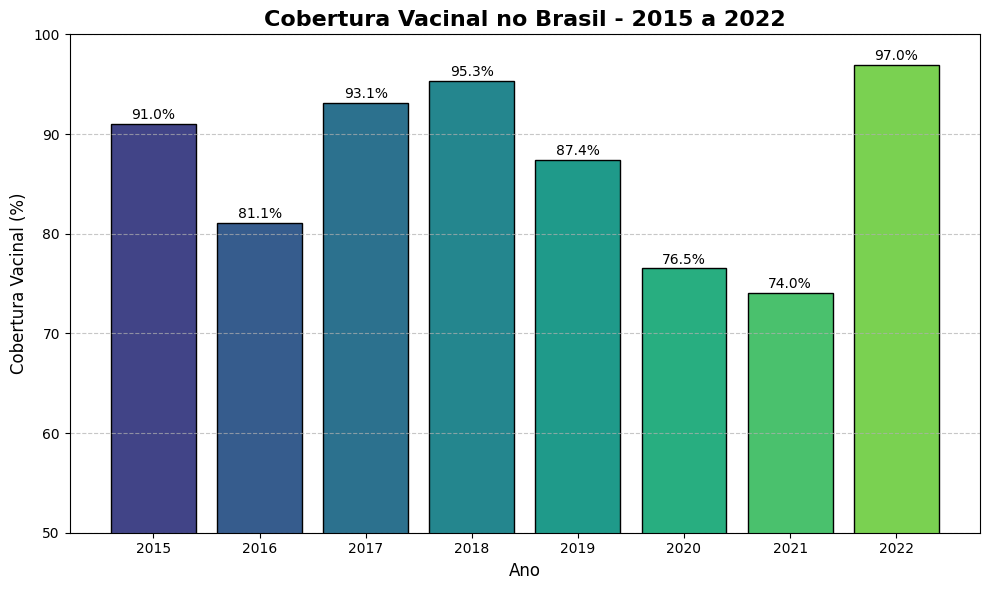

In [635]:
#Construindo gráficos para exemplificar

#Definindo uma paleta de cores
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(anos)))  # Paleta de cores gradiente

# Anos e cobertura vacinal média por ano
anos = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
cobertura_vacinal = df_combinado[["Cobertura Vacinal 2015", "Cobertura Vacinal 2016", "Cobertura Vacinal 2017", "Cobertura Vacinal 2018", "Cobertura Vacinal 2019", "Cobertura Vacinal 2020", "Cobertura Vacinal 2021", "Cobertura Vacinal 2022"]].mean()

# Configuração do gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras com cores diferenciadas e bordas
bars = plt.bar(anos, cobertura_vacinal, color=colors, edgecolor='black')

# Título e rótulos
plt.title("Cobertura Vacinal no Brasil - 2015 a 2022", fontsize=16, fontweight='bold')
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Cobertura Vacinal (%)", fontsize=12)

# Adicionando grid para melhorar a visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustando os limites do eixo y para melhorar a visibilidade
plt.ylim(50, 100)

# Exibir os valores nas barras
for i, valor in enumerate(cobertura_vacinal):
    plt.text(i, valor + 0.5, f'{valor:.1f}%', ha='center', fontsize=10)

# Exibição do gráfico
plt.tight_layout()
plt.show()


O resultado do teste estatístico indicou a existência de uma diferença significativa nos períodos antes (2015 a 2018) e depois das eleições (2019 a 2022).

Existem pontos interessantes a serem considerados:

- 1: fatores que podem influenciar na diferença percebida, mas não necessariamente alinhados ao posicionamento presidencial sobre vacinas;
- 2: houve uma queda considerável em 2019 (de 95,3% em 2018 para 87,4% em 2019) quando em comparação com o ano anterior, contudo, o mesmo ocorreu em 2016 (de 91,0% para 81,1%);
- 2: o próprio contexto pandêmico nos anos 2020 e 2021 que pode ter influenciado na queda na procura das pessoas por outras vacinas, como um movimento de resposta à necessidade de isolamento social;
- 3: houve um aumento ocorrido em 2022, sendo esse o ano com maior cobertura em comparação aos demais.

<div style="background-color: #e0e0e0; padding: 15px; border-radius: 8px;">

<h3 style="color:#333; font-size:20px; font-weight:bold; text-align:center;">
    Pergunta 2:
</h3>

<p style="font-size:16px; text-align:center; color:#444;">
    Há diferença significativa na cobertura vacinal do Brasil quando dividimos os municípios com base em quem foi o candidato eleito naquela região?
</p>

</div>

Da mesma forma como foi feito para a primeira questão, é interessante aplicar um teste estatístico para responder essa pergunta, mas dessa vez entre amostras independentes, ou seja, comparando municípios diferentes. Para isso foi utilizado o teste t Studente, por haver 2 candidatos apenas, uma vez que foi considerado o segundo turno das eleições no Brasil.

- Hipótese nula (H0): Não há diferença significativa na cobertura vacinal entre os municípios com base no candidato eleito.
- Hipótese alternativa (H1): Há uma diferença significativa na cobertura vacinal entre os municípios com base no candidato eleito.

In [636]:
#Diferenciando os municípios de acordo com o candidato eleito

grupo_candidato_A = df_combinado[df_combinado["Nome candidato"] == "JAIR MESSIAS BOLSONARO"][['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018', 'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean(axis=1)

grupo_candidato_B = df_combinado[df_combinado['Nome candidato'] == 'FERNANDO HADDAD'][['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018', 'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean(axis=1)

# Teste t para amostras independentes (t Student)

#Para facilitar a interpretação dos resultados
stat, p_value = ttest_ind(grupo_candidato_A, grupo_candidato_B)

#Resultados
print(f"Resultado do Teste Estatístico (t Student): {stat:.4f}, p-valor: {p_value:.23f}")


#Considerando nível de significância de 5%
alpha = 0.05

if p_value < alpha:
    print(f"Rejeita-se a Hipótese Nula (H0), ou seja, há uma diferença significativa na cobertura vacinal considerando o candidato eleito (p-valor = {p_value:.4f})")
else:
    print(f"Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito se relaciona com a cobertura vacinal (p-valor = {p_value:.4f})")



Resultado do Teste Estatístico (t Student): 9.5389, p-valor: 0.00000000000000000000210
Rejeita-se a Hipótese Nula (H0), ou seja, há uma diferença significativa na cobertura vacinal considerando o candidato eleito (p-valor = 0.0000)


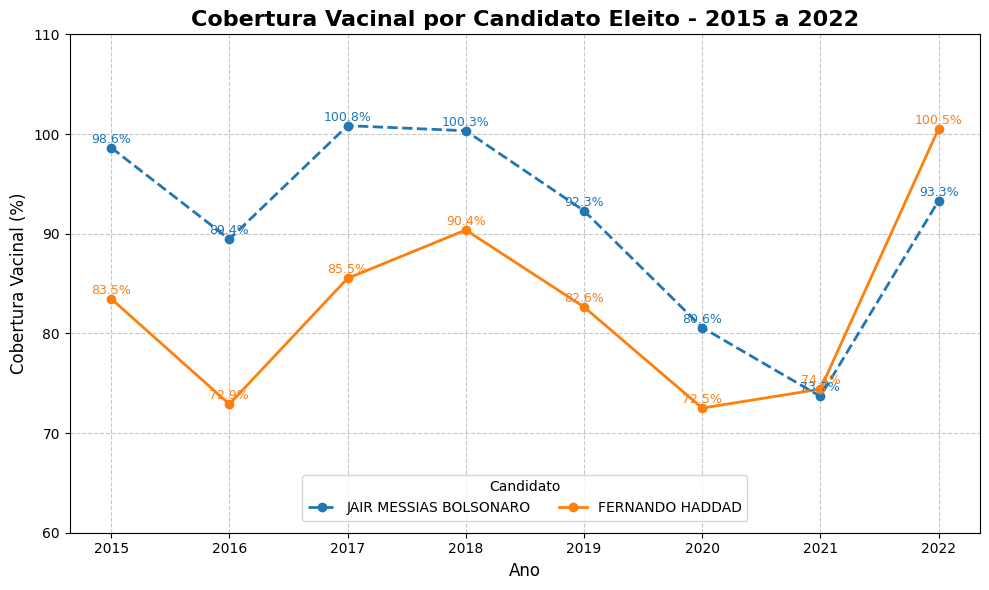

In [637]:
# Calculando a cobertura vacinal média ano a ano para cada grupo
media_candidato_A = df_combinado[df_combinado['Nome candidato'] == 'JAIR MESSIAS BOLSONARO'][['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018', 'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean()
media_candidato_B = df_combinado[df_combinado['Nome candidato'] == 'FERNANDO HADDAD'][['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018', 'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean()

anos = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Gráfico de linhas formatado
plt.figure(figsize=(10, 6))

# Linha para Candidato A
plt.plot(anos, media_candidato_A, label='JAIR MESSIAS BOLSONARO', marker='o', linestyle='--', color='#1f77b4', linewidth=2)

# Linha para Candidato B
plt.plot(anos, media_candidato_B, label='FERNANDO HADDAD', marker='o', linestyle='-', color='#ff7f0e', linewidth=2)

# Configurações de título e rótulos
plt.title('Cobertura Vacinal por Candidato Eleito - 2015 a 2022', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Cobertura Vacinal (%)', fontsize=12)

# Ajustando o limite do eixo y para acomodar valores maiores que 100
plt.ylim(60, 110)

# Adicionando grid e legendas
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Candidato', fontsize=10, loc='lower center', bbox_to_anchor=(0.5, 0.01), ncol=2)

# Garantir que as linhas do eixo x sejam visíveis
plt.xticks(anos)

# Exibir os valores nas linhas
for i, (valor_a, valor_b) in enumerate(zip(media_candidato_A, media_candidato_B)):
    plt.text(anos[i], valor_a + 0.5, f'{valor_a:.1f}%', ha='center', fontsize=9, color='#1f77b4')
    plt.text(anos[i], valor_b + 0.5, f'{valor_b:.1f}%', ha='center', fontsize=9, color='#ff7f0e')

# Melhor ajuste dos elementos gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Resultados foram meio inconclusivos, vou analisar aplicando o a regressão de Diferenças em diferenças (Dif in Dif) que é é uma técnica estatística usada para medir o impacto de uma intervenção ou evento (como uma eleição ou política pública) em dois grupos diferentes, comparando as diferenças em seus resultados antes e depois da intervenção. Essa abordagem é bastante útil em cenários onde você quer medir o impacto de um tratamento, especialmente em situações onde não é possível realizar um experimento controlado.


- Grupo de tratamento: é o grupo que foi exposto à intervenção (como a eleição de um candidato específico), nesse caso será composto pelos municípios que elegeram o candidato Jair Messias Bolsonaro.
- Grupo de controle: é o grupo que não foi exposto à intervenção (ou foi exposto a outro tipo de intervenção), nesse caso será composto pelos municípios que elegeram o candidato Fernando Haddad.

In [638]:
# Criando a variável pos_eleicao (0 para antes de 2018 e 1 para depois)
df_combinado['pos_eleicao'] = df_combinado['Ano de eleição'].apply(lambda x: 1 if x > 2018 else 0)

# Criando a variável grupo_tratamento (1 se o candidato eleito foi Bolsonaro, 0 para outros)
df_combinado['grupo_tratamento'] = df_combinado['Nome candidato'].apply(lambda x: 1 if x == 'JAIR MESSIAS BOLSONARO' else 0)

# Criando a interação Dif in Dif
df_combinado['dif_in_dif'] = df_combinado['pos_eleicao'] * df_combinado['grupo_tratamento']

# Calculando a cobertura vacinal média antes de 2018 (2015 a 2018)
df_combinado['Cobertura_Vacinal_Antes'] = df_combinado[['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 
                                                        'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018']].mean(axis=1)

# Calculando a cobertura vacinal média depois de 2018 (2019 a 2022)
df_combinado['Cobertura_Vacinal_Depois'] = df_combinado[['Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 
                                                         'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean(axis=1)

# Criando uma variável dependente para usar na regressão
df_combinado['Cobertura_Vacinal'] = df_combinado[['Cobertura_Vacinal_Antes', 'Cobertura_Vacinal_Depois']].mean(axis=1)

import statsmodels.formula.api as smf

# Realizando a regressão Dif in Dif
modelo = smf.ols('Cobertura_Vacinal ~ pos_eleicao + grupo_tratamento + dif_in_dif', data=df_combinado).fit()

# Exibindo o resultado da variável de interação (dif_in_dif)
coef_dif_in_dif = modelo.params['dif_in_dif']
p_value_dif_in_dif = modelo.pvalues['dif_in_dif']

# Resultados
print(f"Resultado da Regressão Dif in Dif: coeficiente (dif_in_dif) = {coef_dif_in_dif:.4f}, p-valor = {p_value_dif_in_dif:.23f}")

# Considerando nível de significância de 5%
alpha = 0.05

if p_value_dif_in_dif < alpha:
    print(f"Rejeita-se a Hipótese Nula (H0), ou seja, há um impacto significativo do candidato eleito na cobertura vacinal (p-valor = {p_value_dif_in_dif:.4f})")
else:
    print(f"Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito impacta a cobertura vacinal (p-valor = {p_value_dif_in_dif:.4f})")


Resultado da Regressão Dif in Dif: coeficiente (dif_in_dif) = 0.0000, p-valor = nan
Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito impacta a cobertura vacinal (p-valor = nan)


Considerando a média da cobertura vacinal não chegamos a um resultado, o que sugere que a pandemia pode ter influenciado. Para "tirar os efeitos de pandemia" farei uma análise parecida, porém considerando apenas os anos 2015 (primeiro ano após a eleição de 2014) e o ano de 2019 (primeiro ano após a eleição de 2018 e antes da pandemia).

In [639]:
# Criando a variável pos_eleicao (0 para antes de 2018 e 1 para depois)
df_combinado['pos_eleicao'] = df_combinado['Ano de eleição'].apply(lambda x: 1 if x > 2018 else 0)

# Criando a variável grupo_tratamento (1 se o candidato eleito foi Bolsonaro, 0 para outros)
df_combinado['grupo_tratamento'] = df_combinado['Nome candidato'].apply(lambda x: 1 if x == 'JAIR MESSIAS BOLSONARO' else 0)

# Criando a interação Dif in Dif
df_combinado['dif_in_dif'] = df_combinado['pos_eleicao'] * df_combinado['grupo_tratamento']

# Calculando a cobertura vacinal média antes de 2018 (2015 a 2018)
df_combinado['Cobertura_Vacinal_Antes'] = df_combinado[['Cobertura Vacinal 2015']].mean(axis=1)

# Calculando a cobertura vacinal média depois de 2018 (2019 a 2022)
df_combinado['Cobertura_Vacinal_Depois'] = df_combinado[['Cobertura Vacinal 2019']].mean(axis=1)

# Criando uma variável dependente para usar na regressão
df_combinado['Cobertura_Vacinal'] = df_combinado[['Cobertura_Vacinal_Antes', 'Cobertura_Vacinal_Depois']].mean(axis=1)

import statsmodels.formula.api as smf

# Realizando a regressão Dif in Dif
modelo = smf.ols('Cobertura_Vacinal ~ pos_eleicao + grupo_tratamento + dif_in_dif', data=df_combinado).fit()

# Exibindo o resultado da variável de interação (dif_in_dif)
coef_dif_in_dif = modelo.params['dif_in_dif']
p_value_dif_in_dif = modelo.pvalues['dif_in_dif']

# Resultados
print(f"Resultado da Regressão Dif in Dif: coeficiente (dif_in_dif) = {coef_dif_in_dif:.4f}, p-valor = {p_value_dif_in_dif:.23f}")

# Considerando nível de significância de 5%
alpha = 0.05

if p_value_dif_in_dif < alpha:
    print(f"Rejeita-se a Hipótese Nula (H0), ou seja, há um impacto significativo do candidato eleito na cobertura vacinal (p-valor = {p_value_dif_in_dif:.4f})")
else:
    print(f"Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito impacta a cobertura vacinal (p-valor = {p_value_dif_in_dif:.4f})")


Resultado da Regressão Dif in Dif: coeficiente (dif_in_dif) = 0.0000, p-valor = nan
Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito impacta a cobertura vacinal (p-valor = nan)
